# Install Keras

In [1]:
#from pip._internal import main
#main(["install", "keras"])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from sklearn.model_selection import train_test_split

import keras
from keras.applications import VGG16
from scipy.misc import toimage, imresize
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Input, Flatten, Dense, Activation
from keras.models import Model

import tensorflow as tf 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Using TensorFlow backend.


# Exploring Image data

In [2]:
image_train_data = pd.read_csv("image_train_data.csv")
image_test_data = pd.read_csv("image_test_data.csv")

In [3]:
print(image_train_data.count())
print(image_test_data.count())

id               2005
image            2005
label            2005
deep_features    2005
image_array      2005
dtype: int64
id               4000
image            4000
label            4000
deep_features    4000
image_array      4000
dtype: int64


In [4]:
image_train_data.head(3)

,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...


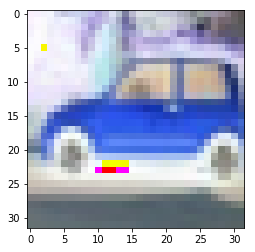

In [86]:
str_img = image_train_data["image_array"].values[100]
str_pixel = str_img.split("[")[1].split("]")[0]
nums = [float(n) for n in str_pixel.split(" ")]
    
X_nums = np.array(nums)
img = X_nums.reshape(32, 32, 3)
plt.imshow(img, interpolation='nearest')
plt.show()


In [88]:
str_img_deep = image_train_data["deep_features"].values[100]
str_pixel_deep = str_img_deep.split("[")[1].split("]")[0]
nums_deep = [float(n) for n in str_pixel_deep.split(" ")]
    
X_nums_deep = np.array(nums_deep)
img_deep = X_nums_deep.reshape(32, 32, 3)
plt.imshow(img_deep, interpolation='nearest')
plt.show()

ValueError: cannot reshape array of size 4096 into shape (32,32,3)

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

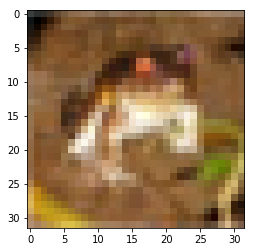

In [6]:
plt.imshow(x_train[0])
plt.show()

In [7]:
I_R = 64
X_train_re = np.zeros((x_train.shape[0],I_R,I_R,3))
for i in range(x_train.shape[0]):
    X_train_re[i] = imresize(x_train[i], (I_R,I_R,3), interp='bilinear', mode=None)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [8]:
X_test_re = np.zeros((x_test.shape[0],I_R,I_R,3))
for i in range(x_test.shape[0]):
    X_test_re[i] = imresize(x_test[i], (I_R,I_R,3), interp='bilinear', mode=None)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
X_train_re = X_train_re.astype('float32')
X_test_re = X_test_re.astype('float32')

In [10]:
nb_classes = 10
Y_train_re = np_utils.to_categorical(y_train, nb_classes)
Y_test_re = np_utils.to_categorical(y_test, nb_classes)

In [11]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(I_R, I_R, 3))

In [12]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [13]:
batch_size = 32
nb_classes = 10
nb_epoch = 200
data_augmentation = True

In [14]:
input = Input(shape=(I_R,I_R,3),name = 'image_input')

output_vgg_conv = vgg_conv(input)

x = Flatten(name='flatten')(output_vgg_conv)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

#x = Dense(units=10)(x)
#x = Activation('softmax')(x)
#model.add(Dense(units=n_class))
#model.add(Activation('softmax'))

my_model = Model(input=input, output=x)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  from ipykernel import kernelapp as app


In [145]:
X_train_features = vgg_conv.predict(X_train_re)

In [152]:
X_test_features = vgg_conv.predict(X_test_re)

In [153]:
print(X_train_features.shape)
print(X_test_features.shape)

(50000, 2, 2, 512)
(10000, 2, 2, 512)


In [155]:
images_rs_train = X_train_features.reshape([50000, 2*2*512])
images_rs_train.shape

(50000, 2048)

In [157]:
images_rs_test = X_test_features.reshape([10000, 2*2*512])
images_rs_test.shape

(10000, 2048)

# Train model

In [15]:
my_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 64, 64, 3)         0         
_________________________________________________________________
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               1049088   
_________________________________________________________________
fc2 (Dense)                  (None, 128)               65664     
_________________________________________________________________
predictions (Dense)          (None, 10)                1290      
Total params: 15,830,730
Trainable params: 15,830,730
Non-trainable params: 0
________________________________________________________________

In [17]:
my_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_json = my_model.to_json()
with open("./model_image_data.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
my_model.fit(X_train_re, Y_train_re,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test_re, Y_test_re),
              shuffle=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
49984/50000 [============================>.] - ETA: 5s - loss: 14.5042 - acc: 0.1000 